In [5]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [7]:
# loading the pictures of tomatoes

train_data_dir = '../data/input/train'
test_data_dir = '../data/input/val' #this folder will be used for evaluating model's perfomance

In [8]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [9]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [10]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [11]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 1000 images belonging to 10 classes.


In [12]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

/home/qirun/tomato_disease/tomato_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
opt = keras.optimizers.Adam(learning_rate=0.001)


In [15]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [16]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [18]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = int(7000/32),
                    epochs = 100,
                    validation_steps = int(3000/32),
                    validation_data = val_gen) 

Epoch 1/100


/home/qirun/tomato_disease/tomato_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


218/218 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.1546 - loss: 2.1996 - val_accuracy: 0.3481 - val_loss: 1.7602
Epoch 2/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:00 1s/step - accuracy: 0.3750 - loss: 1.7717

2024-05-11 12:08:58.359731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3750 - loss: 1.7717 - val_accuracy: 0.2500 - val_loss: 1.7888
Epoch 3/100


2024-05-11 12:08:58.572869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - accuracy: 0.4077 - loss: 1.6130 - val_accuracy: 0.5074 - val_loss: 1.3347
Epoch 4/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 6:10 2s/step - accuracy: 0.5625 - loss: 1.0937

2024-05-11 12:17:00.199437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5625 - loss: 1.0937 - val_accuracy: 0.5833 - val_loss: 1.1330
Epoch 5/100


2024-05-11 12:17:00.604026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.5399 - loss: 1.2707 - val_accuracy: 0.6216 - val_loss: 1.0694
Epoch 6/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:45 1s/step - accuracy: 0.5625 - loss: 1.0489

2024-05-11 12:24:09.689827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5625 - loss: 1.0489 - val_accuracy: 0.5833 - val_loss: 1.0326
Epoch 7/100


2024-05-11 12:24:09.902734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.6366 - loss: 1.0206 - val_accuracy: 0.6969 - val_loss: 0.8726
Epoch 8/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:53 1s/step - accuracy: 0.6562 - loss: 0.9979

2024-05-11 12:32:26.261262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6562 - loss: 0.9979 - val_accuracy: 0.8750 - val_loss: 0.4457
Epoch 9/100


2024-05-11 12:32:26.470513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.7284 - loss: 0.7865 - val_accuracy: 0.7201 - val_loss: 0.7880
Epoch 10/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:59 1s/step - accuracy: 0.7188 - loss: 0.5309

2024-05-11 12:38:34.561905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.5309 - val_accuracy: 0.7917 - val_loss: 0.6451
Epoch 11/100


2024-05-11 12:38:34.777922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.7645 - loss: 0.6622 - val_accuracy: 0.7802 - val_loss: 0.6027
Epoch 12/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:12 1s/step - accuracy: 0.6562 - loss: 1.0107

2024-05-11 12:44:24.178959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6562 - loss: 1.0107 - val_accuracy: 0.7500 - val_loss: 0.5579
Epoch 13/100


2024-05-11 12:44:24.388009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8082 - loss: 0.5433 - val_accuracy: 0.7853 - val_loss: 0.5876
Epoch 14/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 6:22 2s/step - accuracy: 0.8750 - loss: 0.3425

2024-05-11 12:50:28.404046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.3425 - val_accuracy: 0.7500 - val_loss: 0.6502
Epoch 15/100


2024-05-11 12:50:29.048627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.8316 - loss: 0.4899 - val_accuracy: 0.8280 - val_loss: 0.4939
Epoch 16/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 5:42 2s/step - accuracy: 0.8125 - loss: 0.6227

2024-05-11 12:59:04.872702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.6227 - val_accuracy: 0.8333 - val_loss: 0.3702
Epoch 17/100


2024-05-11 12:59:05.270044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.8424 - loss: 0.4386 - val_accuracy: 0.8639 - val_loss: 0.3890
Epoch 18/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 6:03 2s/step - accuracy: 0.8125 - loss: 0.4771

2024-05-11 13:07:20.638667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8125 - loss: 0.4771 - val_accuracy: 0.8750 - val_loss: 0.3392
Epoch 19/100


2024-05-11 13:07:20.933544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 8764s 40s/step - accuracy: 0.8657 - loss: 0.3722 - val_accuracy: 0.8669 - val_loss: 0.3812
Epoch 20/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8125 - loss: 0.4871 - val_accuracy: 0.8750 - val_loss: 0.4805
Epoch 21/100


2024-05-11 15:33:25.552024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 15:33:25.734327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8713 - loss: 0.3640 - val_accuracy: 0.8767 - val_loss: 0.3778
Epoch 22/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:35 995ms/step - accuracy: 0.8438 - loss: 0.3340

2024-05-11 15:38:25.525650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3340 - val_accuracy: 0.8750 - val_loss: 0.2961
Epoch 23/100


2024-05-11 15:38:25.839355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.8842 - loss: 0.3239 - val_accuracy: 0.8740 - val_loss: 0.3497
Epoch 24/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:51 1s/step - accuracy: 0.9062 - loss: 0.1768

2024-05-11 15:43:48.837592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.1768 - val_accuracy: 0.8333 - val_loss: 0.5143
Epoch 25/100


2024-05-11 15:43:49.160113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.8965 - loss: 0.2897 - val_accuracy: 0.8891 - val_loss: 0.3058
Epoch 26/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:41 1s/step - accuracy: 0.9375 - loss: 0.4053

2024-05-11 15:49:20.439176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.4053 - val_accuracy: 0.8333 - val_loss: 0.3404
Epoch 27/100


2024-05-11 15:49:20.644574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.9162 - loss: 0.2325 - val_accuracy: 0.9019 - val_loss: 0.2758
Epoch 28/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 5:12 1s/step - accuracy: 0.9062 - loss: 0.2092

2024-05-11 15:57:16.850037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2092 - val_accuracy: 0.8750 - val_loss: 0.1510
Epoch 29/100


2024-05-11 15:57:17.303536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 464s 2s/step - accuracy: 0.9081 - loss: 0.2744 - val_accuracy: 0.8810 - val_loss: 0.3480
Epoch 30/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 5:13 1s/step - accuracy: 0.8750 - loss: 0.2917

2024-05-11 16:05:02.500543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.2917 - val_accuracy: 0.8333 - val_loss: 0.4895
Epoch 31/100


2024-05-11 16:05:02.803636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 842s 4s/step - accuracy: 0.9148 - loss: 0.2395 - val_accuracy: 0.9059 - val_loss: 0.2932
Epoch 32/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9375 - loss: 0.1574 - val_accuracy: 0.7083 - val_loss: 1.1616
Epoch 33/100


2024-05-11 16:19:05.460441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 16:19:05.636737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.9109 - loss: 0.2443 - val_accuracy: 0.9086 - val_loss: 0.2653
Epoch 34/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:13 1s/step - accuracy: 0.9375 - loss: 0.2803

2024-05-11 16:24:14.430968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2803 - val_accuracy: 0.9167 - val_loss: 0.2134
Epoch 35/100


2024-05-11 16:24:14.656578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9091 - loss: 0.2454 - val_accuracy: 0.9281 - val_loss: 0.2159
Epoch 36/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:01 1s/step - accuracy: 0.9062 - loss: 0.2546

2024-05-11 16:29:54.420286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2546 - val_accuracy: 0.9583 - val_loss: 0.0890
Epoch 37/100


2024-05-11 16:29:54.698458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9112 - loss: 0.2639 - val_accuracy: 0.9039 - val_loss: 0.2804
Epoch 38/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 2:56 814ms/step - accuracy: 0.9583 - loss: 0.0846

2024-05-11 16:35:29.358152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9583 - loss: 0.0846 - val_accuracy: 0.9583 - val_loss: 0.1211
Epoch 39/100


2024-05-11 16:35:29.576455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9239 - loss: 0.2036 - val_accuracy: 0.9049 - val_loss: 0.2820
Epoch 40/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:50 1s/step - accuracy: 0.9688 - loss: 0.0885

2024-05-11 16:41:05.863067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0885 - val_accuracy: 0.9167 - val_loss: 0.2607
Epoch 41/100


2024-05-11 16:41:06.076685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.9297 - loss: 0.1978 - val_accuracy: 0.8982 - val_loss: 0.3129
Epoch 42/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 4:10 1s/step - accuracy: 0.9375 - loss: 0.2187

2024-05-11 16:46:52.838397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 16:46:53.035529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.9375 - loss: 0.2187 - val_accuracy: 0.8333 - val_loss: 0.4703
Epoch 43/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.9230 - loss: 0.2084 - val_accuracy: 0.9059 - val_loss: 0.2611
Epoch 44/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:41 1s/step - accuracy: 0.9375 - loss: 0.1719

2024-05-11 16:52:21.905721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 16:52:22.097995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.9375 - loss: 0.1719 - val_accuracy: 0.8333 - val_loss: 0.3763
Epoch 45/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.9365 - loss: 0.1849 - val_accuracy: 0.9257 - val_loss: 0.2229
Epoch 46/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:40 1s/step - accuracy: 0.9375 - loss: 0.0937

2024-05-11 16:57:25.944878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 16:57:26.145276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.9375 - loss: 0.0937 - val_accuracy: 0.9583 - val_loss: 0.2817
Epoch 47/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9416 - loss: 0.1769 - val_accuracy: 0.9150 - val_loss: 0.2511
Epoch 48/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:40 1s/step - accuracy: 0.9688 - loss: 0.0684

2024-05-11 17:02:42.573026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 17:02:42.767323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9688 - loss: 0.0684 - val_accuracy: 0.9583 - val_loss: 0.1201
Epoch 49/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.9469 - loss: 0.1738 - val_accuracy: 0.8935 - val_loss: 0.3225
Epoch 50/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:38 1s/step - accuracy: 0.9688 - loss: 0.0745

2024-05-11 17:07:55.960575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-11 17:07:56.159390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0745 - val_accuracy: 1.0000 - val_loss: 0.0471
Epoch 51/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9467 - loss: 0.1488 - val_accuracy: 0.9140 - val_loss: 0.2455
Epoch 52/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:57 1s/step - accuracy: 0.9688 - loss: 0.0878

2024-05-11 17:13:38.544445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0878 - val_accuracy: 0.9583 - val_loss: 0.1232
Epoch 53/100


2024-05-11 17:13:38.764366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.9447 - loss: 0.1599 - val_accuracy: 0.9180 - val_loss: 0.2573
Epoch 54/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 5:58 2s/step - accuracy: 0.9375 - loss: 0.2043

2024-05-11 17:20:08.930466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2043 - val_accuracy: 0.9583 - val_loss: 0.0961
Epoch 55/100


2024-05-11 17:20:09.280496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.9365 - loss: 0.1830 - val_accuracy: 0.9261 - val_loss: 0.2161
Epoch 56/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 8:21 2s/step - accuracy: 1.0000 - loss: 0.0111

2024-05-11 17:29:01.298226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9583 - val_loss: 0.2665
Epoch 57/100


2024-05-11 17:29:01.604541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9362 - loss: 0.1648 - val_accuracy: 0.9069 - val_loss: 0.2830
Epoch 58/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:51 1s/step - accuracy: 0.9375 - loss: 0.1217

2024-05-11 17:34:52.224782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1217 - val_accuracy: 0.9167 - val_loss: 0.2747
Epoch 59/100


2024-05-11 17:34:52.535268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9365 - loss: 0.1717 - val_accuracy: 0.9167 - val_loss: 0.2519
Epoch 60/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:50 1s/step - accuracy: 0.9062 - loss: 0.1535

2024-05-11 17:40:30.066887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.1535 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 61/100


2024-05-11 17:40:30.281009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9519 - loss: 0.1411 - val_accuracy: 0.9278 - val_loss: 0.2137
Epoch 62/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:53 1s/step - accuracy: 0.9375 - loss: 0.1619

2024-05-11 17:46:06.497500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.1619 - val_accuracy: 0.9583 - val_loss: 0.0885
Epoch 63/100


2024-05-11 17:46:06.715584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9524 - loss: 0.1351 - val_accuracy: 0.9318 - val_loss: 0.2056
Epoch 64/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:52 1s/step - accuracy: 0.9688 - loss: 0.0382

2024-05-11 17:51:37.382076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0382 - val_accuracy: 0.9167 - val_loss: 0.3104
Epoch 65/100


2024-05-11 17:51:37.596282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9586 - loss: 0.1126 - val_accuracy: 0.9281 - val_loss: 0.2262
Epoch 66/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:52 1s/step - accuracy: 0.9688 - loss: 0.0660

2024-05-11 17:57:01.537617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0660 - val_accuracy: 0.9583 - val_loss: 0.2142
Epoch 67/100


2024-05-11 17:57:01.781138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9598 - loss: 0.1053 - val_accuracy: 0.9244 - val_loss: 0.2258
Epoch 68/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:44 1s/step - accuracy: 0.9688 - loss: 0.0390

2024-05-11 18:02:24.987390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0390 - val_accuracy: 0.8750 - val_loss: 0.3235
Epoch 69/100


2024-05-11 18:02:25.199477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9487 - loss: 0.1424 - val_accuracy: 0.9204 - val_loss: 0.2466
Epoch 70/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 3:49 1s/step - accuracy: 0.9375 - loss: 0.0922

2024-05-11 18:08:06.891853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.0922 - val_accuracy: 1.0000 - val_loss: 0.0564
Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 50.


2024-05-11 18:08:07.101332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [19]:
scores = cnn.evaluate(test_gen)


32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 854ms/step - accuracy: 0.8415 - loss: 0.5548


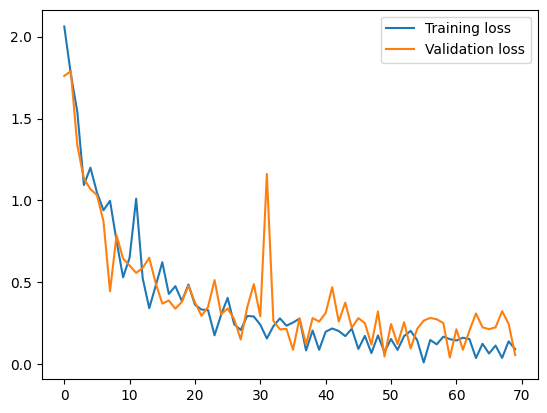

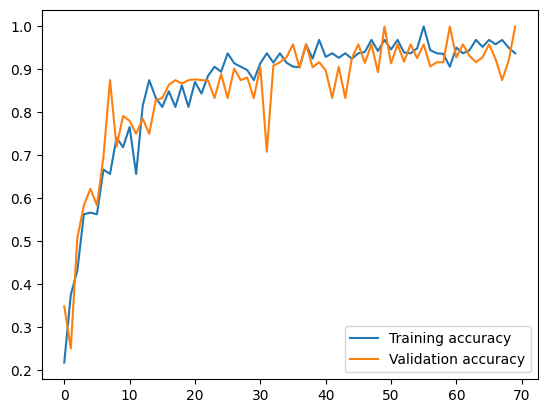

In [20]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [21]:
# don't forget to save your model for later
cnn.save('modelcnn_70.h5')

In [22]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


/tmp/ipykernel_172221/534764079.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [23]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 670ms/step


In [24]:
predictions[1]


array([9.7150892e-01, 1.2550720e-03, 2.2710016e-04, 3.4236840e-05,
       2.1940348e-05, 1.7340436e-04, 4.7448343e-03, 2.2034194e-02,
       3.5487002e-08, 2.1507344e-07], dtype=float32)

In [25]:
predicted_classes = np.argmax(predictions,axis=1)

In [26]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [27]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[ 77   5   1   1   1   0   2  13   0   0]
 [  1  83   8   0   1   0   1   6   0   0]
 [  0   1  92   3   1   0   0   2   1   0]
 [  0   0   1  91   1   0   1   3   3   0]
 [  0   5   8   0  82   1   1   1   1   1]
 [  0   0   1   0   0  84   6   0   8   1]
 [  0   2   0   0   1   5  90   0   1   1]
 [  0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   2   0   2   0   0   0   0  96]]


In [28]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      0.77      0.87       100
                        Tomato___Early_blight       0.86      0.83      0.85       100
                         Tomato___Late_blight       0.81      0.92      0.86       100
                           Tomato___Leaf_Mold       0.96      0.91      0.93       100
                  Tomato___Septoria_leaf_spot       0.92      0.82      0.87       100
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.84      0.88       100
                         Tomato___Target_Spot       0.89      0.90      0.90       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.80      1.00      0.89       100
                 Tomato___Tomato_mosaic_virus       0.88      1.00      0.93       100
                             Tomato___healthy       0.97      0.96      0.96       100

                                     accu

In [30]:
df = pd.DataFrame(history.history)
df.to_csv("../data/output/model_cnn_70.csv")